<a href="https://colab.research.google.com/github/lismahesha/data-analyst-project/blob/main/Olist%20customer%20segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Preparation

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

# Read Data

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1JSrslrGGk2aK5MGrKVygx8HGb9CJm882Px5_u867yic/edit#gid=1040883369'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
df.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,delivered,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-05-22 0:00:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,delivered,2018-06-26 11:01:38,2018-06-29 20:32:09,2018-07-16 0:00:00


In [ ]:
df['customer_id'] = pd.Series(df['customer_id'], dtype="string");
df['customer_unique_id'] = pd.Series(df['customer_unique_id'], dtype="string");
df['customer_city'] = pd.Series(df['customer_city'], dtype="string");
df['customer_state'] = pd.Series(df['customer_state'], dtype="string");
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_status'] = pd.Series(df['order_status'], dtype="string")
df['order_id'] = pd.Series(df['order_id'], dtype="string");
df['payment_type'] = pd.Series(df['payment_type'], dtype="string");
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103886 non-null  string        
 1   payment_sequential             103886 non-null  int64         
 2   payment_type                   103886 non-null  string        
 3   payment_installments           103886 non-null  int64         
 4   payment_value                  103886 non-null  float64       
 5   customer_id                    103886 non-null  string        
 6   customer_unique_id             103886 non-null  string        
 7   customer_zip_code_prefix       103886 non-null  int64         
 8   customer_city                  103886 non-null  string        
 9   customer_state                 103886 non-null  string        
 10  order_status                   103886 non-null  string        
 11  

The data has been cleaned.

# Clustering

In [ ]:
df_cluster=df.copy()
df_cluster.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,delivered,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-05-22
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,delivered,2018-06-26 11:01:38,2018-06-29 20:32:09,2018-07-16


In [ ]:
dum_df = pd.get_dummies(df_cluster, columns=["payment_type"], prefix=["payment_type"])
df_cluster = df_cluster.merge(dum_df)
df_cluster.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,delivered,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-05-22,0,1,0,0,0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,delivered,2018-06-26 11:01:38,2018-06-29 20:32:09,2018-07-16,0,1,0,0,0


In [ ]:
dum_df = pd.get_dummies(df_cluster, columns=["order_status"], prefix=["order_status"])
df_cluster = df_cluster.merge(dum_df)
df_cluster.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,...,payment_type_not_defined,payment_type_voucher,order_status_approved,order_status_canceled,order_status_created,order_status_delivered,order_status_invoiced,order_status_processing,order_status_shipped,order_status_unavailable
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,...,0,0,0,0,0,1,0,0,0,0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_cluster = df_cluster.drop(['order_id','order_status','payment_type','customer_id','customer_unique_id','customer_city','customer_state','customer_zip_code_prefix','order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date'],axis=1)

In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   payment_sequential        103886 non-null  int64  
 1   payment_installments      103886 non-null  int64  
 2   payment_value             103886 non-null  float64
 3   payment_type_boleto       103886 non-null  uint8  
 4   payment_type_credit_card  103886 non-null  uint8  
 5   payment_type_debit_card   103886 non-null  uint8  
 6   payment_type_not_defined  103886 non-null  uint8  
 7   payment_type_voucher      103886 non-null  uint8  
 8   order_status_approved     103886 non-null  uint8  
 9   order_status_canceled     103886 non-null  uint8  
 10  order_status_created      103886 non-null  uint8  
 11  order_status_delivered    103886 non-null  uint8  
 12  order_status_invoiced     103886 non-null  uint8  
 13  order_status_processing   103886 non-null  u

In [ ]:
numerical_column=['payment_sequential','payment_installments','payment_value']

In [ ]:
scaler = MinMaxScaler()
df_cluster[numerical_column] = scaler.fit_transform(df_cluster[numerical_column])
df_cluster.head(2)


,payment_sequential,payment_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher,order_status_approved,order_status_canceled,order_status_created,order_status_delivered,order_status_invoiced,order_status_processing,order_status_shipped,order_status_unavailable
0,0.0,0.333333,0.007269,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0.0,0.041667,0.001785,0,1,0,0,0,0,0,0,1,0,0,0,0


## elbow_method

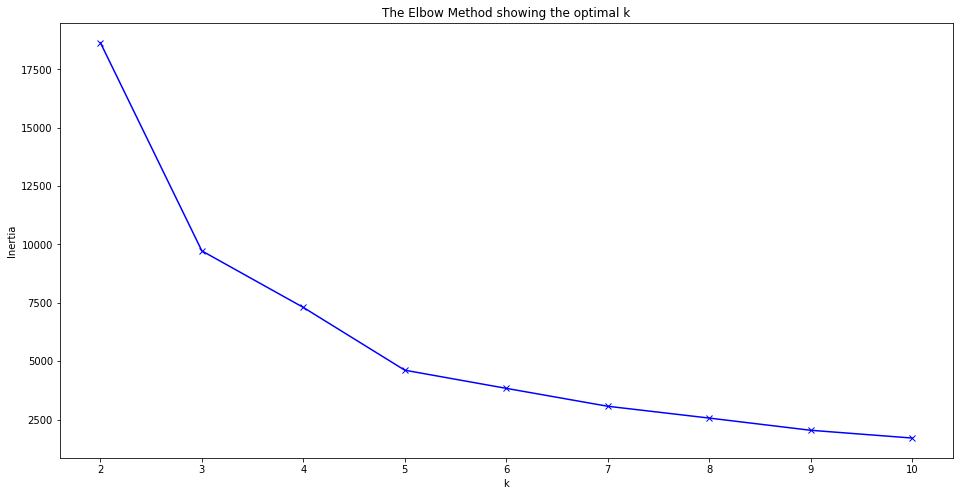

In [ ]:
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## silhoutte_analysis

In [ ]:
!gdown https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l

Downloading...
From: https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l
To: /content/silhoutte.py
100% 4.34k/4.34k [00:00<00:00, 6.51MB/s]


In [ ]:
from silhoutte import silhoutte_analysis

In [ ]:
df_cluster.columns

Index(['payment_sequential', 'payment_installments', 'payment_value',
       'payment_type_boleto', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_not_defined',
       'payment_type_voucher', 'order_status_approved',
       'order_status_canceled', 'order_status_created',
       'order_status_delivered', 'order_status_invoiced',
       'order_status_processing', 'order_status_shipped',
       'order_status_unavailable'],
      dtype='object')

For n_clusters = 2 The average silhouette_score is : 0.78556273070434
For n_clusters = 3 The average silhouette_score is : 0.8638461496022469
For n_clusters = 4 The average silhouette_score is : 0.8850428165755377
For n_clusters = 5 The average silhouette_score is : 0.9010466468170478
For n_clusters = 6 The average silhouette_score is : 0.7354565894737196
For n_clusters = 7 The average silhouette_score is : 0.7416852986039042
For n_clusters = 8 The average silhouette_score is : 0.7456840907254066
For n_clusters = 9 The average silhouette_score is : 0.7501789267294037
For n_clusters = 10 The average silhouette_score is : 0.7615697495531012


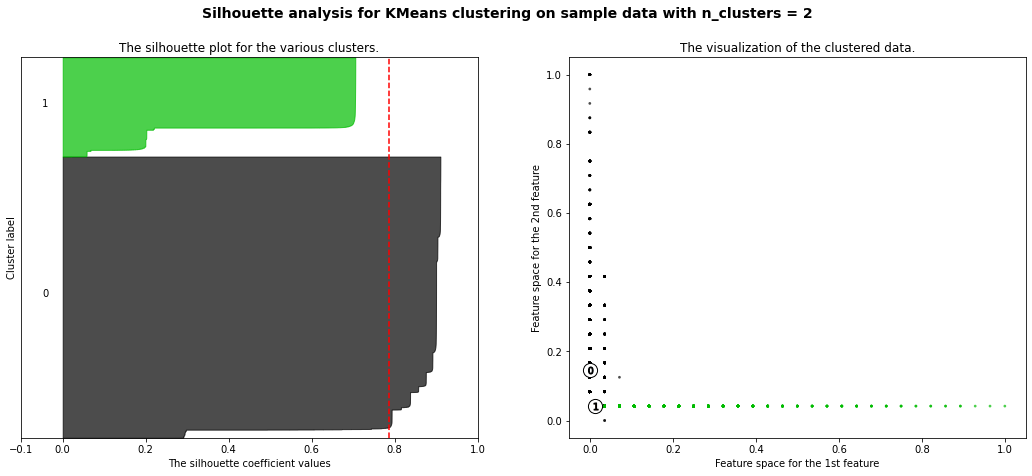

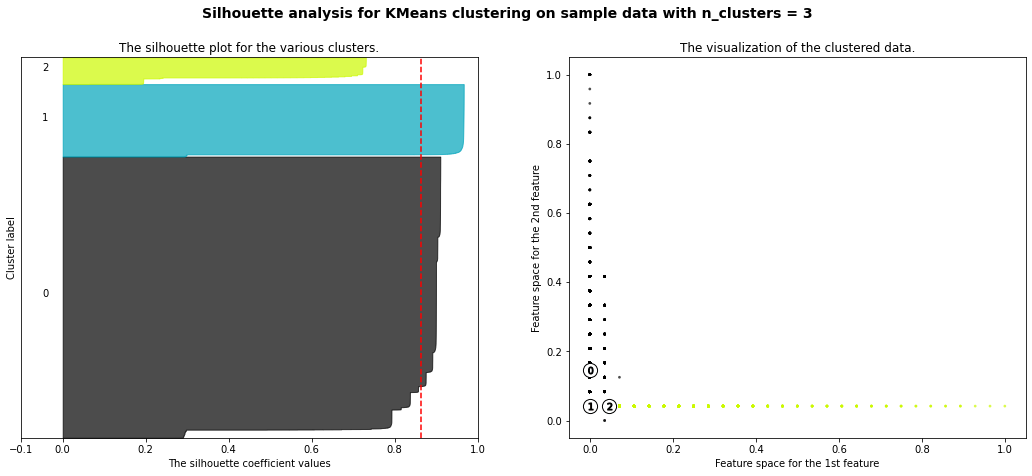

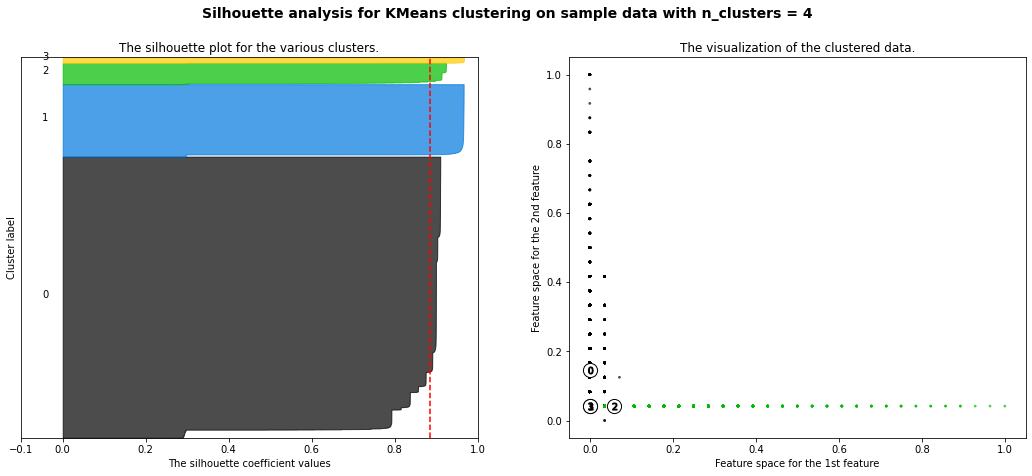

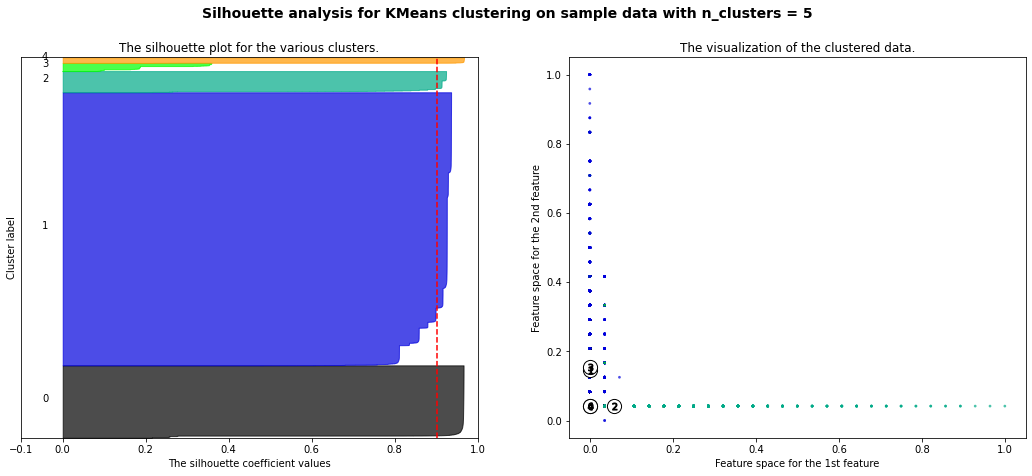

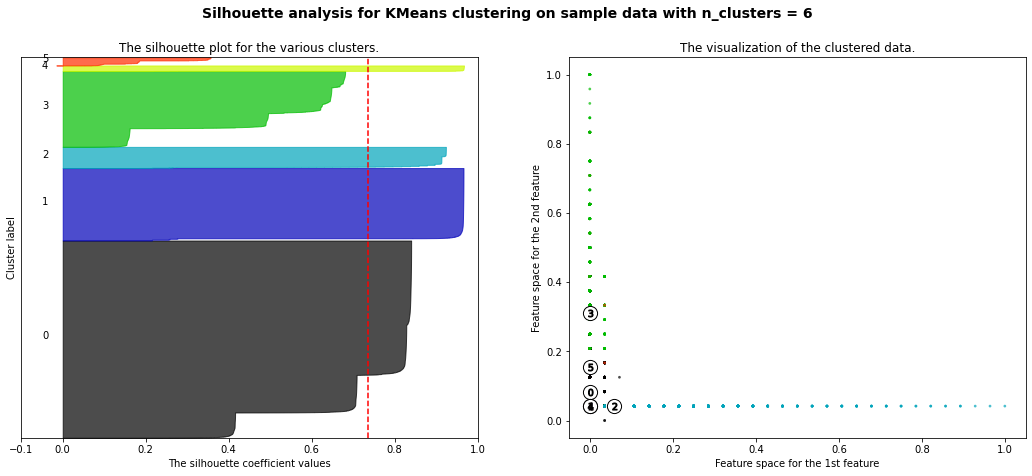

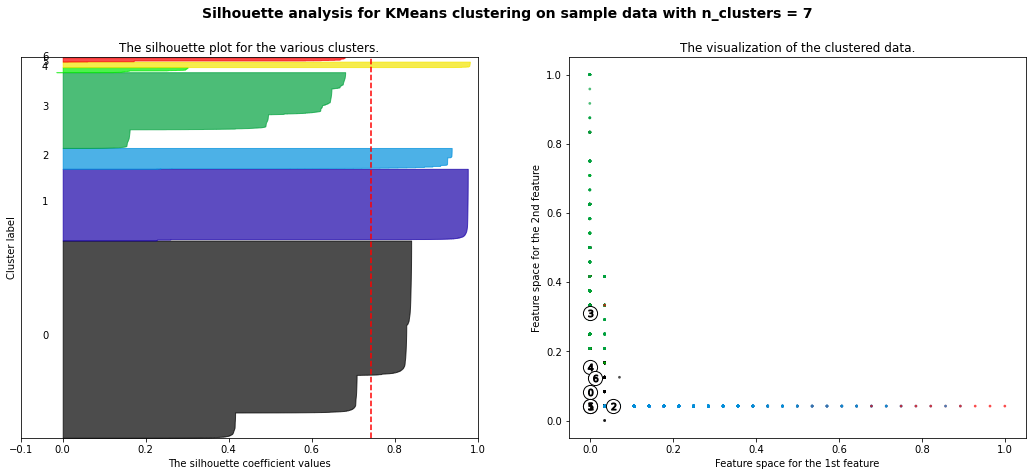

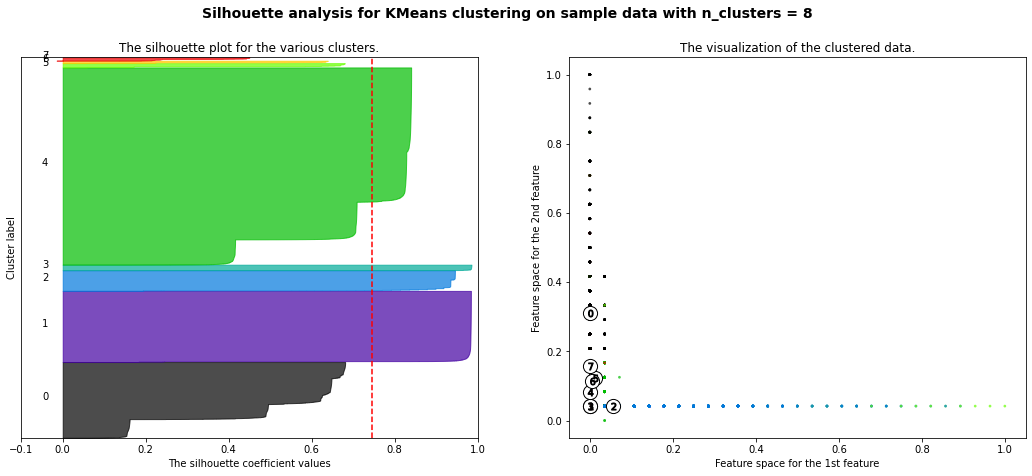

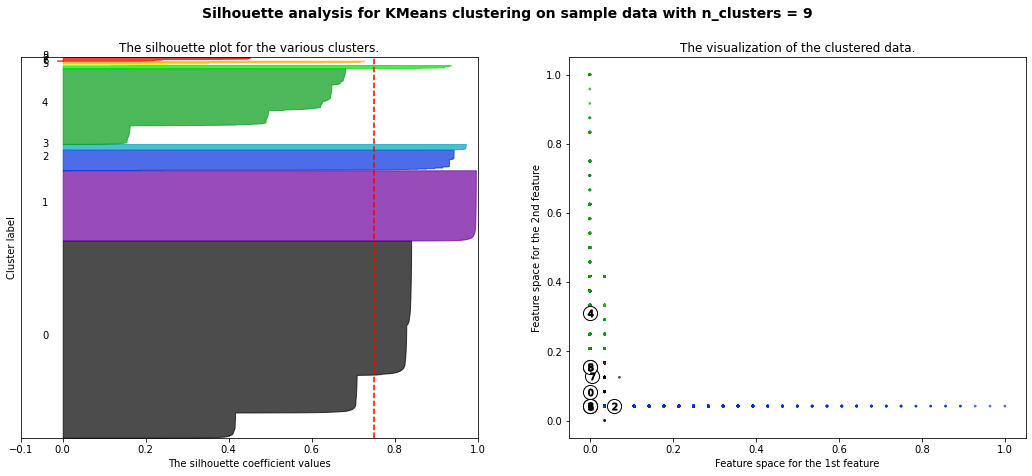

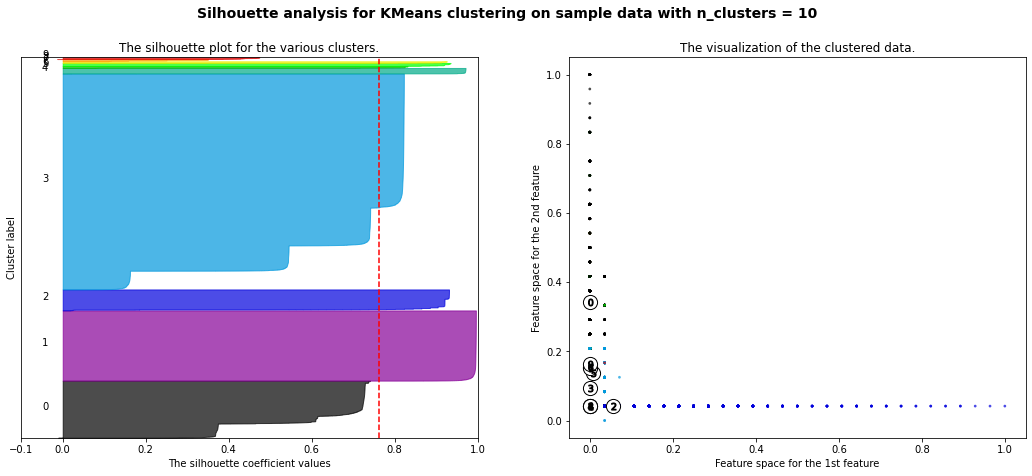

In [ ]:
#from silhoutte import silhoutte_analysis
silhoutte_analysis(df_cluster,list(range(2,11)))

In [ ]:
cluster_model = cluster.KMeans(n_clusters=5, random_state=3)
cluster_label = cluster_model.fit_predict(df_cluster)
df['cluster'] = cluster_label
df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,cluster
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,delivered,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-05-22,1
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,delivered,2018-06-26 11:01:38,2018-06-29 20:32:09,2018-07-16,1
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,delivered,2017-12-12 11:19:55,2017-12-18 17:24:41,2018-01-04,1
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,delivered,2017-12-06 12:04:06,2017-12-21 01:35:51,2018-01-04,1
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,4291db0da71914754618cd789aebcd56,18570,conchas,SP,delivered,2018-05-21 13:59:17,2018-06-01 21:44:53,2018-06-13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,delivered,2018-03-08 16:57:23,2018-03-16 13:09:51,2018-04-04,0
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG,delivered,2017-08-18 09:45:35,2017-08-23 22:25:56,2017-09-12,1
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP,invoiced,2017-11-18 17:27:14,2018-01-09 19:18:39,2017-12-05,4
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,b84dc68f02f122a88d7e7bbd37b06204,22733,rio de janeiro,RJ,delivered,2018-08-07 23:26:13,2018-08-21 22:41:46,2018-08-24,1


In [ ]:
df.groupby(['cluster','payment_type','order_status'])['payment_sequential'].agg(['count','mean','median','max','min']).head(50)

count      mean  median  max  min
cluster payment_type order_status                                   
0       boleto       canceled         95  1.000000     1.0    1    1
                     created           2  1.000000     1.0    1    1
                     delivered     19191  1.000052     1.0    2    1
                     invoiced         67  1.000000     1.0    1    1
                     processing       70  1.000000     1.0    1    1
                     shipped         209  1.000000     1.0    1    1
                     unavailable     150  1.000000     1.0    1    1
1       credit_card  delivered     74586  1.004183     1.0    3    1
2       voucher      canceled        115  1.886957     1.0    9    1
                     delivered      5493  2.554706     2.0   26    1
                     invoiced         13  2.000000     2.0    3    1
                     processing       23  3.304348     2.0   10    1
                     shipped          84  6.250000     2.0   29    1
                     unavailable      47  3.234043     2.0   10    1
3       debit_card   canceled          7  1.000000     1.0    1    1
                     delivered      1486  1.034320     1.0    3    1
                     invoiced          6  1.000000     1.0    1    1
                     processing        2  1.500000     1.5    2    1
                     shipped          22  1.000000     1.0    1    1
                     unavailable       6  1.166667     1.0    2    1
4       credit_card  approved          2  1.000000     1.0    1    1
                     canceled        444  1.000000     1.0    1    1
                     created           3  1.000000     1.0    1    1
                     invoiced        239  1.000000     1.0    1    1
                     processing      224  1.008929     1.0    2    1
                     shipped         851  1.003525     1.0    2    1
                     unavailable     446  1.006726     1.0    2    1
        not_defined  canceled          3  1.000000     1.0    1    1

In [ ]:
df.groupby(['cluster','payment_type','order_status'])['payment_installments'].agg(['count','mean','median','max','min']).head(50)

count      mean  median  max  min
cluster payment_type order_status                                   
0       boleto       canceled         95  1.000000     1.0    1    1
                     created           2  1.000000     1.0    1    1
                     delivered     19191  1.000000     1.0    1    1
                     invoiced         67  1.000000     1.0    1    1
                     processing       70  1.000000     1.0    1    1
                     shipped         209  1.000000     1.0    1    1
                     unavailable     150  1.000000     1.0    1    1
1       credit_card  delivered     74586  3.501314     3.0   24    0
2       voucher      canceled        115  1.000000     1.0    1    1
                     delivered      5493  1.000000     1.0    1    1
                     invoiced         13  1.000000     1.0    1    1
                     processing       23  1.000000     1.0    1    1
                     shipped          84  1.000000     1.0    1    1
                     unavailable      47  1.000000     1.0    1    1
3       debit_card   canceled          7  1.000000     1.0    1    1
                     delivered      1486  1.000000     1.0    1    1
                     invoiced          6  1.000000     1.0    1    1
                     processing        2  1.000000     1.0    1    1
                     shipped          22  1.000000     1.0    1    1
                     unavailable       6  1.000000     1.0    1    1
4       credit_card  approved          2  3.000000     3.0    5    1
                     canceled        444  3.673423     3.0   13    1
                     created           3  7.666667     7.0   10    6
                     invoiced        239  3.523013     3.0   15    1
                     processing      224  4.263393     3.0   14    1
                     shipped         851  3.693302     3.0   20    1
                     unavailable     446  3.549327     2.0   17    1
        not_defined  canceled          3  1.000000     1.0    1    1

In [ ]:
df.groupby(['cluster','payment_type','order_status'])['payment_value'].agg(['sum','count','mean','median','max','min']).head(50)

sum  count        mean   median  \
cluster payment_type order_status                                            
0       boleto       canceled         17504.10     95  184.253684  107.850   
                     created            175.44      2   87.720000   87.720   
                     delivered      2769932.58  19191  144.334979   93.780   
                     invoiced         15330.82     67  228.818209  142.480   
                     processing       17135.76     70  244.796571  123.655   
                     shipped          24227.70    209  115.922010   88.290   
                     unavailable      25054.87    150  167.032467  101.500   
1       credit_card  delivered     12101094.88  74586  162.243516  106.840   
2       voucher      canceled         25664.92    115  223.173217   84.580   
                     delivered       343013.19   5493   62.445511   39.040   
                     invoiced          1727.00     13  132.846154   82.090   
                     processing        1004.55     23   43.676087   16.310   
                     shipped           4129.66     84   49.162619   32.510   
                     unavailable       3897.55     47   82.926596   30.000   
3       debit_card   canceled          2711.27      7  387.324286   44.470   
                     delivered       208421.12   1486  140.256474   89.600   
                     invoiced           986.04      6  164.340000   78.105   
                     processing         349.79      2  174.895000  174.895   
                     shipped           2660.80     22  120.945455   73.005   
                     unavailable       2860.77      6  476.795000  120.450   
4       credit_card  approved           241.08      2  120.540000  120.540   
                     canceled         97375.31    444  219.313761  110.920   
                     created            512.66      3  170.886667  160.940   
                     invoiced         51094.13    239  213.782971  132.570   
                     processing       50904.01    224  227.250045  145.560   
                     shipped         146195.80    851  171.792949  105.330   
                     unavailable      94666.32    446  212.256323  103.890   
        not_defined  canceled             0.00      3    0.000000    0.000   

                                        max     min  
cluster payment_type order_status                    
0       boleto       canceled       1949.52   20.23  
                     created         137.60   37.84  
                     delivered      7274.88   11.62  
                     invoiced        893.16   28.22  
                     processing     2566.90   26.00  
                     shipped         742.85   15.38  
                     unavailable    1641.51   18.37  
1       credit_card  delivered     13664.08    0.01  
2       voucher      canceled       3184.34    2.96  
                     delivered      1839.05    0.00  
                     invoiced        543.59    9.23  
                     processing      242.03    0.17  
                     shipped         314.31    0.00  
                     unavailable     824.00    4.74  
3       debit_card   canceled       2404.72   23.29  
                     delivered      4445.50   13.38  
                     invoiced        553.23   38.27  
                     processing      261.97   87.82  
                     shipped         449.49   27.70  
                     unavailable    2345.03   32.09  
4       credit_card  approved        179.46   61.62  
                     canceled       4809.44    0.33  
                     created         245.85  105.87  
                     invoiced       1827.72    1.02  
                     processing     1426.81    9.10  
                     shipped        2360.42    1.70  
                     unavailable    3782.19    0.07  
        not_defined  canceled          0.00    0.00

In [ ]:
df.groupby('cluster')['customer_id'].agg(['count'])

,count
cluster,
0,19784
1,74586
2,5775
3,1529
4,2212


## Summary

**Summary:**

The distribution of data on each cluster not quite good **(the clusters are not distributed)**

Cluster characteristic:

**Cluster 0**
*   Customer using *boleto* for their preferred payment method.
*   Customer likely to choose *1 payment installment*.

**Cluster 1**
*   Customer using *credit card* for their preferred payment method.
*   Customer likely to choose *3 payment installments*.
*   Only consists customers with an order status = 'delivered'.
*   has the highest order and total purchase amount.

**Cluster 2**
*   Customer using *voucher* for their preferred payment method.
*   Customer likely to choose *1 payment installments*.

**Cluster 3**
*   Customer using *debit card* for their preferred payment method.
*   Customer likely to choose *1 payment installments*.
*   has the least order and the least total purchase amount

**Cluster 4**
*   Customer using *credit card* for their preferred payment method.
*   Customer likely to choose *3 payment installments*.
*   consists of customers with an order status that have not 'delivered' yet.